# Storytelling with data - matplotlib graph examples

Here is a collection of examples of graphs from "Storytelling with data" by Cole Nussbaumer Knaflic that I coded with Matplotlib. She executed her graphs with Microsoft Excel, but since our data is more often in dataframes in Jupyter or in Mode, I thought it would be useful to have examples of how to use matplotlib for these graphs.

Matplotlib code can look complex but it is simple once you get the gist of it. It is perfect for storytelling with data because it is very flexible and gives a lot of control over each element in a figure. In particular, color and annotations are key.

Enjoy!

- Françoise Provencher, Hack Days, Dec 13 2019 ([Github](https://github.com/francoiseprovencher/datastorytelling/))

p.s. [other python graph ressource](https://github.com/matthewbrems/odsc-west-2018-visualization/blob/master/data-viz-talk-solution-code.ipynb) that might be interesting for more examples

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

%matplotlib inline



## Vertical bar chart : pilot program

In [2]:
pilot = pd.DataFrame([['Bored', 11, 12],
                     ['Not great', 5, 6],
                     ['OK', 40, 14],
                     ['Kind of \ninterested', 25, 30],
                     ['Excited', 19, 38]])

In [3]:
pilot

,0,1,2
0,Bored,11,12
1,Not great,5,6
2,OK,40,14
3,Kind of \ninterested,25,30
4,Excited,19,38


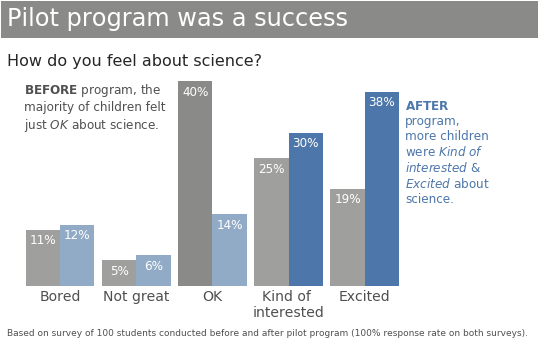

In [4]:
### Parameters ###

#colors
dim_blue = '#91ABC7'
highlight_blue = '#4D77AA'
light_grey = '#9F9F9E'
dark_grey = '#8A8A88'
darker_grey = '#505050'

# Data
labels = pilot[0]
series_1 = pilot[1]
series_2 = pilot[2]

# Color ordering of the bars
series_1_colors = [light_grey, light_grey, dark_grey, light_grey, light_grey]
series_2_colors = [dim_blue, dim_blue, dim_blue, highlight_blue, highlight_blue]

### Bar graph code ###
x = np.arange(len(labels))  # the x label locations
width = 0.45  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, series_1, width, label='Before', color=series_1_colors)
rects2 = ax.bar(x + width/2, series_2, width, label='After', color=series_2_colors)

### Title and labels ### 

# Title
ax.set_title('How do you feel about science?', 
             fontdict={
                 'fontsize': 16,
                 'fontweight' : 'normal',
                 'verticalalignment': 'baseline',
                 'horizontalalignment': 'left'},
            loc='left') #left aligned title

# x ticks labels
ax.set_xticks(x)
ax.set_xticklabels(labels, color=darker_grey) # this adds the labels under each group on the x axis
for item in ax.get_xticklabels(): #change fontsize of x tick labels
    item.set_fontsize(14)


# Label each bar
def bar_label_percent(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(height), # format, with percent mark
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, -17),  # -17 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', 
                    color='w', size=12) # text color white

bar_label_percent(rects1)
bar_label_percent(rects2)

### Removing clutter to increase data to ink ratio ###

# Hide grid lines
ax.grid(False) 

# Remove y axis ticks and labels
ax.set_yticks([]) 

# Remove the box around the graph
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

### Adding annotations ###
# Note : here is no good way of wrapping text, so you have to introduce linebreaks manually. 
# To mix bold, italics and linebraks, you have to concatenate raw strings with normal strings or use triple quotes.
# I find triple quotes easier to work with.



annotation_1 = r"""$\bf{BEFORE}$ program, the
majority of children felt
just $\it{OK}$ about science."""
ax.text(0.04, 0.95, annotation_1, 
        transform=ax.transAxes, # this transform argument anchors the text to the axes coordinates instead of data coordinates
        fontsize=12, 
        color=darker_grey,
        verticalalignment='top')

annotation_2 = r"""$\bf{AFTER}$
program,
more children
were $\it{Kind\ of}$
$\it{interested}$ & 
$\it{Excited}$ about
science."""
ax.text(0.97, 0.87, annotation_2, 
        transform=ax.transAxes, # this transform argument anchors the text to the axes coordinates instead of data coordinates
        fontsize=12, 
        color=highlight_blue,
        verticalalignment='top')

annotation_3 = "Pilot program was a success                        "
props = dict(boxstyle='square', facecolor=dark_grey, edgecolor='w', alpha=1.0) # Tracing a box around the text
ax.text(0.0, 1.30, annotation_3, transform=ax.transAxes, fontsize=24, color='w',
        verticalalignment='top', bbox=props)

annotation_4 = "Based on survey of 100 students conducted before and after pilot program (100% response rate on both surveys)."
ax.text(0.0, -0.20, annotation_4, 
        transform=ax.transAxes, # this transform argument anchors the text to the axes coordinates instead of data coordinates
        fontsize=9, 
        color=darker_grey,
        verticalalignment='top')

fig.tight_layout()
#fig.savefig('pilot_project.png', format='png', dpi=300, bbox_inches = "tight")
plt.show()

## Line graph : tickets processed

In [5]:
tickets = pd.DataFrame([
    [160, 184, 241, 149, 180, 161, 132, 202, 160, 139, 149, 177],
    [160, 184, 237, 148, 181, 150, 123, 156, 126, 104, 124, 140],
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]).T
tickets.columns = ['Received', 'Processed', 'Month']

In [6]:
tickets

,Received,Processed,Month
0,160,160,Jan
1,184,184,Feb
2,241,237,Mar
3,149,148,Apr
4,180,181,May
5,161,150,Jun
6,132,123,Jul
7,202,156,Aug
8,160,126,Sep
9,139,104,Oct


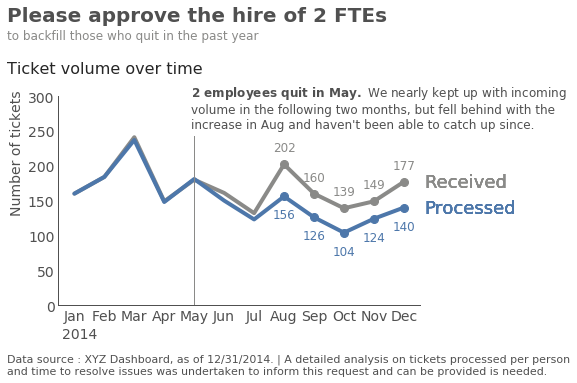

In [7]:
### Parameters ###

#colors
dim_blue = '#91ABC7'
highlight_blue = '#4D77AA'
light_grey = '#9F9F9E'
dark_grey = '#8A8A88'
darker_grey = '#505050'

# Data
labels = tickets['Month']
series_1 = tickets['Received']
series_2 = tickets['Processed']

# Color of lines
series_1_color = dark_grey
series_2_color = highlight_blue

### Line graph code ###
x = xrange(len(labels))

markers_on = [7, 8, 9, 10, 11] # position of points where we want markers
fig, ax = plt.subplots(figsize=(6, 4.2))
line_1 = ax.plot(x, series_1, label='Received', color=series_1_color, linewidth=4, marker='o', markersize=8, markevery=markers_on)
line_2 = ax.plot(x, series_2, label='Processed', color=series_2_color, linewidth=4, marker='o', markersize=8, markevery=markers_on)

### Title and labels ### 

# Title
ax.set_title('Ticket volume over time',  x= -0.14, y=1.08, # x and y offset
             fontdict={
                 'fontsize': 16,
                 'fontweight' : 'normal',
                 'verticalalignment': 'baseline',
                 'horizontalalignment': 'left'},
            loc='left') #left aligned title

# x ticks , axis and labels
ax.set_xlabel('2014', fontsize=14, color=darker_grey, horizontalalignment='left', x=0.01) 
ax.set_xticks(x)
ax.set_xticklabels(labels, color=darker_grey) # this adds the labels under each group on the x axis

for item in ax.get_xticklabels(): # change fontsize of x tick labels
    item.set_fontsize(14)

# y axis

ax.set_ylabel('Number of tickets', fontsize=14, color=darker_grey,  horizontalalignment='right',  y=1.03)# 
ax.tick_params(axis='y', colors=darker_grey)
ax.set_ylim([0, 300])

for item in ax.get_yticklabels(): # change fontsize of x tick labels
    item.set_fontsize(14)
    
    
# Label the markers
def label_points(series, markers_on=markers_on, color=dark_grey, v_offset=10):
    """Attach a text label above each point"""
    for mark_num in markers_on:
        value = series[mark_num]
        ax.annotate('{}'.format(value), # format
                    xy=(mark_num, value),
                    xytext=(0, v_offset),  # 5 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', 
                    color=color, size=12) 

label_points(series_1)
label_points(series_2, color=highlight_blue, v_offset=-25)

# Label the series with the name of the series in the same color as the line
def label_series(series, series_name='series name', color=dark_grey):
    """Attach a text label above each point"""
    for mark_num in markers_on:
        x = len(series) - 1
        y = series[-1:]
        ax.annotate('{}'.format(series_name), # format
                    xy=(x, y),
                    xytext=(20, 0),  #offset for text
                    textcoords="offset points",
                    ha='left', va='center', 
                    color=color, size=18) 
        
label_series(series_1, series_name='Received')
label_series(series_2, series_name='Processed', color=highlight_blue)

### Removing clutter to increase data to ink ratio ###

# Hide grid lines
ax.grid(False) 


# Remove 2 spines and make the others grey
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(darker_grey)
ax.spines['left'].set_color(darker_grey)

### Adding annotations ###
# Note : here is no good way of wrapping text, so you have to introduce linebreaks manually. 
# To mix bold, italics and linebraks, you have to concatenate raw strings with normal strings or use triple quotes.
# I find triple quotes easier to work with.

big_title_text= "Please approve the hire of 2 FTEs"
ax.text(-0.14, 1.43, big_title_text, transform=ax.transAxes, fontsize=20, color=darker_grey, style='normal', weight='bold',
        verticalalignment='top')

subtitle_text= "to backfill those who quit in the past year"
ax.text(-0.14, 1.32, subtitle_text, transform=ax.transAxes, fontsize=12, color=dark_grey, style='normal', weight='normal',
        verticalalignment='top')

# vertical line!
plt.axvline(x=4, color=dark_grey, linewidth=1)

annotation_1 = r"""$\bf{2\ employees\ quit\ in\ May.}$ We nearly kept up with incoming
volume in the following two months, but fell behind with the 
increase in Aug and haven't been able to catch up since."""
props = dict(boxstyle='square', facecolor='w', edgecolor='w', alpha=1.0) # Tracing a box around the text
ax.text(3.9, 320, annotation_1, 
        fontsize=12, 
        color=darker_grey,
        verticalalignment='top',
       bbox=props)

footnote_text = """Data source : XYZ Dashboard, as of 12/31/2014. | A detailed analysis on tickets processed per person
and time to resolve issues was undertaken to inform this request and can be provided is needed."""
ax.text(-0.14, -0.23, footnote_text, 
        transform=ax.transAxes, # this transform argument anchors the text to the axes coordinates instead of data coordinates
        fontsize=11, 
        color=darker_grey,
        verticalalignment='top')

fig.tight_layout()
#fig.savefig('ticket_volume.png', format='png', dpi=300, bbox_inches = "tight")
plt.show()

## Slopegraph : employee feedback

In [9]:
orange = '#ff830f'
dark_grey = '#8A8A88'

feedback = pd.DataFrame([['Career development', 49, 33, orange],
                        ['Rewards & recognition', 41, 45, dark_grey],
                        ['Peers', 85, 91, dark_grey],
                        ['Culture', 80, 85, dark_grey],
                        ['Work environment', 76, 75, dark_grey],
                        ['Leadership', 59,62, dark_grey],
                        ['Perf management', 33, 42, dark_grey],
                        ])

feedback

,0,1,2,3
0,Career development,49,33,#ff830f
1,Rewards & recognition,41,45,#8A8A88
2,Peers,85,91,#8A8A88
3,Culture,80,85,#8A8A88
4,Work environment,76,75,#8A8A88
5,Leadership,59,62,#8A8A88
6,Perf management,33,42,#8A8A88


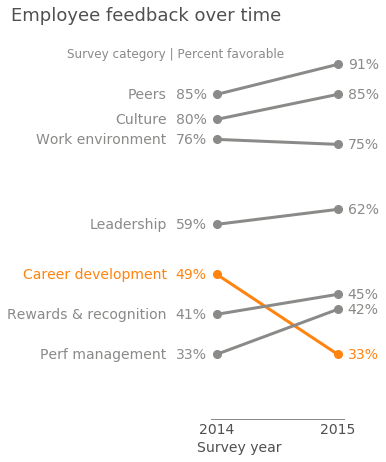

In [10]:
##### Parameters ###

#colors
orange = '#ff830f'
light_grey = '#9F9F9E'
dark_grey = '#8A8A88'
darker_grey = '#505050'

# Data
xlabels = ['2014', '2015']
ylabels = feedback[0]
before = feedback[1]
after = feedback[2]
colors = feedback[3]


### Line graph code ###

# Label the series with the name of the series in the same color as the line
def label_series(series, series_name='series name', color=dark_grey):
    """Attach a text label at the beginning of each series"""
    x = 0
    y = series[0]
    ax.annotate('{}'.format(series_name), # format
                xy=(x, y),
                xytext=(-50, 0),  #offset for text
                textcoords="offset points",
                ha='right', va='center', 
                color=color, size=14) 
    
# Label the markers
def label_points(series, color=dark_grey):
    """Attach a text label to each point"""
    value = series[0]
    ax.annotate('{}%'.format(value), # format
                xy=(0, value),
                xytext=(-10, 0),  # offset
                textcoords="offset points",
                ha='right', va='center', 
                color=color, size=14) 
    value = series[1]
    ax.annotate('{}%'.format(value), # format
                xy=(1, value),
                xytext=(10, 0),  # offset
                textcoords="offset points",
                ha='left', va='center', 
                color=color, size=14) 


x = xrange(len(xlabels))
fig, ax = plt.subplots(figsize=(2.5, 6))

for row in feedback.iterrows():
    ylabel, before, after, color = row[1]
    line_1 = ax.plot(x, [before, after], color=color, linewidth=3, marker='o', markersize=8)
    label_series([before, after], series_name=ylabel, color=color)
    label_points([before, after], color=color)

### axis labels ### 

# x ticks , axis and labels
ax.set_xlabel('Survey year', fontsize=14, color=darker_grey, horizontalalignment='left', x=-0.10) 
ax.tick_params(axis='x', colors=darker_grey, direction='out')
ax.set_xticks(x)
ax.set_xticklabels(xlabels, color=darker_grey) # this adds the labels under each group on the x axis


for item in ax.get_xticklabels(): # change fontsize of x tick labels
    item.set_fontsize(14)

# y axis
ax.set_ylim([20, 95])
ax.set_yticks([]) # Remove y axis ticks and labels

### Removing clutter to increase data to ink ratio ###

# Hide grid lines
ax.grid(False) 

# Remove the box around the graph, except the bottom one which we want grey
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color(dark_grey)


### Adding annotations ###
# Note : here is no good way of wrapping text, so you have to introduce linebreaks manually. 
# To mix bold, italics and linebraks, you have to concatenate raw strings with normal strings or use triple quotes.
# I find triple quotes easier to work with.

title_text= "Employee feedback over time"
ax.text(-1.5, 1.1, title_text, transform=ax.transAxes, fontsize=18, color=darker_grey, style='normal', weight='normal',
        verticalalignment='top', horizontalalignment='left')

subtitle_text= "Survey category | Percent favorable"
ax.text(-0.26, 0.99, subtitle_text, transform=ax.transAxes, fontsize=12, color=dark_grey, style='normal', weight='normal',
        verticalalignment='top', horizontalalignment='center')


fig.tight_layout()
#fig.savefig('ticket_volume.png', format='png', dpi=300, bbox_inches = "tight")
plt.show()

# Area graph

In [11]:
area = pd.DataFrame([
    [1]*5 + [2]*2 + [3]*3,
    [1]*5 + [2]*2 + [3]*3,
    [1]*5 + [2]*2 + [3]*3,
    [1]*5 + [2]*5 ,
    [1]*5 + [2]*5 ,
    [1]*10,
    [1]*10,
    [1]*10,
    [1]*10,
    [1]*10
])

In [12]:
area
# a pcolor graph inverts the y axis, i.e. the origin (0,0) is top left corner
# so our area matrix has to be flipped vertically

,0,1,2,3,4,5,6,7,8,9
0,1,1,1,1,1,2,2,3,3,3
1,1,1,1,1,1,2,2,3,3,3
2,1,1,1,1,1,2,2,3,3,3
3,1,1,1,1,1,2,2,2,2,2
4,1,1,1,1,1,2,2,2,2,2
5,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1
7,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,1
9,1,1,1,1,1,1,1,1,1,1


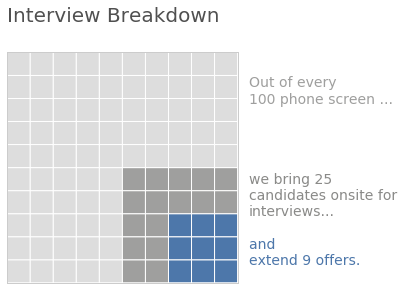

In [13]:
# custom colormap
from matplotlib.colors import LinearSegmentedColormap

colors=['#dddddd', light_grey, highlight_blue]
cmap_name = 'area_graph_colors'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=len(colors))

#figure

fig, ax = plt.subplots(figsize=(3.5, 3.5)); # To be a square, the x and y dimensions must be the same
s = plt.pcolor(area, axes=ax, edgecolor='#ffffff', linewidth=1, cmap=cm);
ax.set_xticks([]) ;
ax.set_yticks([]) ;

title_text= "Interview Breakdown"
ax.text(0, 1.2, title_text, transform=ax.transAxes, fontsize=20, color=darker_grey, style='normal', weight='normal',
        verticalalignment='top', horizontalalignment='left')

annot_1= """Out of every 
100 phone screen ..."""
ax.text(1.05, 0.9, annot_1, transform=ax.transAxes, fontsize=14, color=light_grey, style='normal', weight='normal',
        verticalalignment='top', horizontalalignment='left')

annot_2= """we bring 25 
candidates onsite for
interviews..."""
ax.text(1.05, 0.48, annot_2, transform=ax.transAxes, fontsize=14, color=dark_grey, style='normal', weight='normal',
        verticalalignment='top', horizontalalignment='left')

annot_3= """and 
extend 9 offers."""
ax.text(1.05, 0.2, annot_3, transform=ax.transAxes, fontsize=14, color=colors[2], style='normal', weight='normal',
        verticalalignment='top', horizontalalignment='left')

fig.tight_layout()
#fig.savefig('interview.png', format='png', dpi=300, bbox_inches = "tight")
plt.show()

## Table heatmap

This can be achieved with pandas table styling, not matplotlib (I tried with matplotlib tables, but they don't look good).

In [14]:
heat = pd.DataFrame([[15,22,42],
                    [40,36,20],
                    [35,17,34],
                    [30,29,26],
                    [55,30,58],
                    [11,25,49]], 
                    columns=['A', 'B', 'C'], 
                    index=['Category {}'.format(i) for i in range(1,7)])

In [15]:
heat

,A,B,C
Category 1,15,22,42
Category 2,40,36,20
Category 3,35,17,34
Category 4,30,29,26
Category 5,55,30,58
Category 6,11,25,49


In [16]:
# Simple example, but not as pretty as in the book
heat.style.background_gradient(cmap='Blues')

,A,B,C
Category 1,15,22,42
Category 2,40,36,20
Category 3,35,17,34
Category 4,30,29,26
Category 5,55,30,58
Category 6,11,25,49


In [17]:
table_styles = [ # selector = valid CSS selectorm props are (attribute, value) tuples of CSS attributes
    dict(selector="th", props=[("font-size", "100%"),  # th is table header
                               ("text-align", "center")])
]

(heat.style
  .background_gradient(cmap='Blues', low=0.05, high=0.70) # low and high control the portion of the cmap we use
  .format("{}%") # to have the percentage sign inside the cells
  .set_properties(**{'color': darker_grey,
                     'border-color': 'white',
                     'border-width': '4px',
                     'min-width': '80px',
                     'max-width': '420px', 
                     'font-size': '11pt',
                     'font-weight': 'bold'})
  .set_table_styles(table_styles)
 
)

# Note : we cannot style the headers or the headers cells (well, maybe with more css, but not out-of-the-box)

,A,B,C
Category 1,15%,22%,42%
Category 2,40%,36%,20%
Category 3,35%,17%,34%
Category 4,30%,29%,26%
Category 5,55%,30%,58%
Category 6,11%,25%,49%


## Scatterplot

In [18]:
miles = pd.DataFrame([[1000, 1150, 1020, 1280, 1500, 1360, 1900, 2000],
                     [2.75, 2.50, 2.3, 2.15, 1.92, 1.74, 2.42, 2.53]]).T

In [19]:
miles

,0,1
0,1000.0,2.75
1,1150.0,2.50
2,1020.0,2.30
3,1280.0,2.15
4,1500.0,1.92
5,1360.0,1.74
6,1900.0,2.42
7,2000.0,2.53


In [20]:
average = miles[1].mean()

In [21]:
average

2.28875

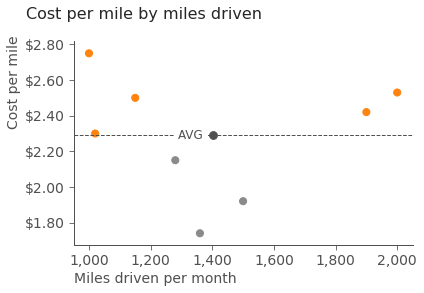

In [22]:
from matplotlib import ticker # for formatting ticks with money sign

### Parameters ###

#colors
orange = '#ff830f'
dim_blue = '#91ABC7'
highlight_blue = '#4D77AA'
light_grey = '#9F9F9E'
dark_grey = '#8A8A88'
darker_grey = '#505050'

# Data
x = miles[0]
y = miles[1]

# color points above average orange, below grey
colors = [orange if num > average else dark_grey for num in y]

### scatter graph code ###

fig, ax = plt.subplots(figsize=(6, 4.2))
scatterplot = ax.scatter(x, y,s=50, label='Received', c=colors, linestyle='None', marker='o' )

### Title and labels ### 

# Title
ax.set_title('Cost per mile by miles driven',  x= -0.14, y=1.08, # x and y offset
             fontdict={
                 'fontsize': 16,
                 'fontweight' : 'normal',
                 'verticalalignment': 'baseline',
                 'horizontalalignment': 'left'},
            loc='left') #left aligned title

# x ticks , axis and labels
ax.set_xlabel('Miles driven per month', fontsize=14, color=darker_grey, horizontalalignment='left', x=0.0)
ax.tick_params(axis='x', colors=darker_grey, length=5)

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}')) # thousands formatting

for item in ax.get_xticklabels(): # change fontsize of x tick labels
    item.set_fontsize(14)

# y axis

ax.set_ylabel('Cost per mile', fontsize=14, color=darker_grey,  horizontalalignment='right',  y=1.03)# 
ax.tick_params(axis='y', colors=darker_grey, length=5)
#ax.set_ylim([0, 300])

formatter = ticker.FormatStrFormatter('$%1.2f') # money formatting
ax.yaxis.set_major_formatter(formatter)

for item in ax.get_yticklabels(): # change fontsize of x tick labels
    item.set_fontsize(14)


### Removing clutter to increase data to ink ratio ###

# Hide grid lines
ax.grid(False) 

# Remove some spines around the graph
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(darker_grey)
ax.spines['left'].set_color(darker_grey)

### Adding annotations ###
# Note : here is no good way of wrapping text, so you have to introduce linebreaks manually. 
# To mix bold, italics and linebraks, you have to concatenate raw strings with normal strings or use triple quotes.
# I find triple quotes easier to work with.


# horizontal line!
plt.axhline(y=average, color=darker_grey, linewidth=1, linestyle='--')
annotation_text= "AVG"
props = dict(boxstyle='square', facecolor='w', edgecolor='w', alpha=1.0) # Tracing a box around the text
ax.text(np.mean(x)-30, average, annotation_text, fontsize=12, color=darker_grey, style='normal', weight='normal',
        verticalalignment='center', horizontalalignment='right', bbox=props)
plt.scatter(x=np.mean(x), y=average, s=60, c=darker_grey, marker='o')


fig.tight_layout()
#fig.savefig('scatter.png', format='png', dpi=300, bbox_inches = "tight")
plt.show()